In [1]:

import warnings

warnings.filterwarnings('ignore')



### COMPAS is used to score criminal defendant’s likelihood of reoffending. This is one of the most popular scores used nationwide and is increasingly being used in pretrial and sentencing. We could detect bias in COMPAS using just the defendant’s name and the model prediction. 



#### Step 1: Read COMPAS data


In [2]:

import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('compas-scores-two-years.csv', index_col='id')
df = df.reset_index(drop=True)


In [3]:

len(df)


7214

In [4]:

df.head()


,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [5]:

df_demographic_breakdown = df.reset_index()[['index', 'sex', 'race']].pivot_table(index='sex', columns='race', values='index', aggfunc='count')
df_demographic_breakdown


race,African-American,Asian,Caucasian,Hispanic,Native American,Other
sex,,,,,,
Female,652,2,567,103,4,67
Male,3044,30,1887,534,14,310


In [6]:

df_demographic_breakdown['total'] = df_demographic_breakdown.sum(axis=1)
df_demographic_breakdown.loc['total'] = df_demographic_breakdown.sum(axis=0)
df_demographic_breakdown


race,African-American,Asian,Caucasian,Hispanic,Native American,Other,total
sex,,,,,,,
Female,652,2,567,103,4,67,1395
Male,3044,30,1887,534,14,310,5819
total,3696,32,2454,637,18,377,7214


In [7]:

df.columns


Index(['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age',
       'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [8]:

df[['first', 'last', 'decile_score', 'is_recid']].head()


,first,last,decile_score,is_recid
0,miguel,hernandez,1,0
1,kevon,dixon,3,1
2,ed,philo,4,1
3,marcu,brown,8,0
4,bouthy,pierrelouis,1,0


In [9]:

df.groupby('score_text')['decile_score'].value_counts().sort_values(ascending=False)


score_text  decile_score
Low         1               1440
            2                941
            4                769
            3                747
Medium      5                681
            6                641
            7                592
High        8                512
            9                508
            10               383
Name: decile_score, dtype: int64


#### Step 2: Install the Bias Detector


In [10]:

%%capture

pip install --upgrade bias-detector


In [11]:

from bias_detector.BiasDetector import BiasDetector

bias_detector = BiasDetector(country='US')



#### Step 3: Prepare input for Bias Detector


In [12]:

first_names = df['first']
last_names = df['last']
y_pred = df['decile_score'].astype(float) >= 5
y_true = df['two_year_recid'].astype(float)
y_scores = df['decile_score'].astype(float)


In [13]:

df['sex'].value_counts()


Male      5819
Female    1395
Name: sex, dtype: int64

In [14]:

df['race'].value_counts()


African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [15]:

p_groups = pd.DataFrame(index=list(range(len(df))))
p_groups['male'] = df['sex'] == 'Male'
p_groups['female'] = df['sex'] == 'Female'
p_groups['white'] = df['race'] == 'Caucasian'
p_groups['black'] = df['race'] == 'African-American'
p_groups['api'] = df['race'] == 'Asian'
p_groups['hispanic'] = df['race'] == 'Hispanic'
p_groups['native'] = df['race'] == 'Native American'
p_groups = p_groups.fillna(0)
p_groups = p_groups.astype(float)


In [16]:

p_groups.sum()


male        5819.0
female      1395.0
white       2454.0
black       3696.0
api           32.0
hispanic     637.0
native        18.0
dtype: float64

In [17]:

p_groups.head()


,male,female,white,black,api,hispanic,native
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0



#### Step 4: Detect bias using the defendant's gender/race


In [18]:

direct_bias_report = bias_detector.get_bias_report(y_pred = y_pred, 
                                            y_true = y_true, 
                                            p_groups = p_groups,
                                            privileged_race = 'white')


In [19]:

direct_bias_report.print_summary()


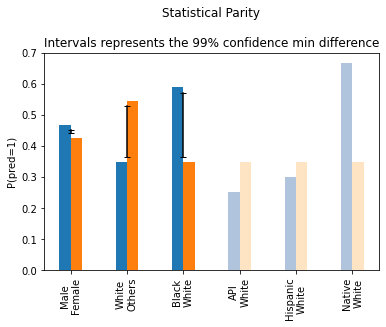

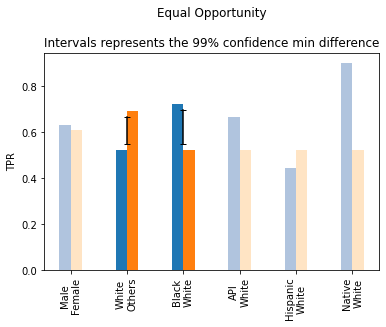

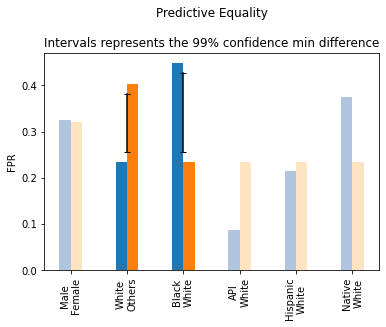

In [20]:

direct_bias_report.plot_summary()


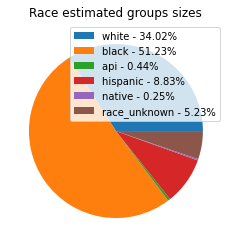

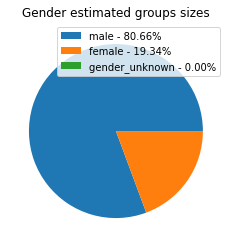

In [21]:

direct_bias_report.plot_groups()


In [22]:

direct_bias_report.estimated_groups_sizes


male              5819
female            1395
white             2454
black             3696
api                 32
hispanic           637
native              18
gender_unknown       0
race_unknown       377
dtype: int64


#### Step 5: Detect bias using the defendant's name


In [23]:

inferred_bias_report = bias_detector.get_bias_report(first_names = first_names,
                                            last_names = last_names,
                                            y_pred = y_pred, 
                                            y_true = y_true, 
                                            privileged_race = 'white')


In [24]:

inferred_bias_report.print_summary()


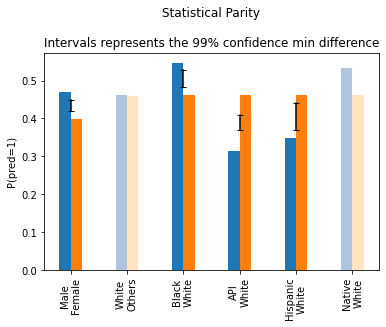

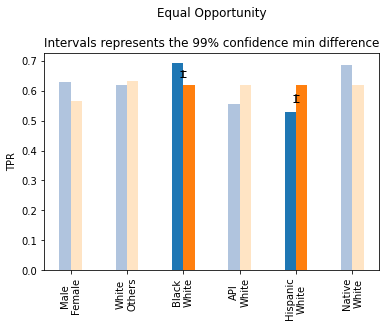

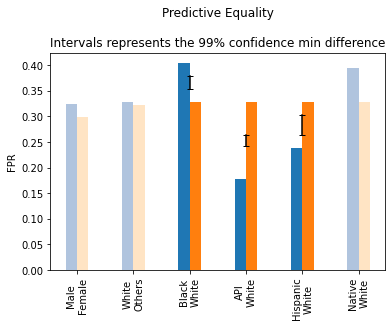

In [25]:

inferred_bias_report.plot_summary()


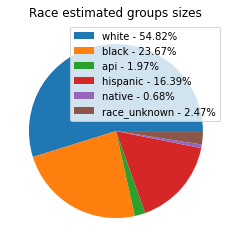

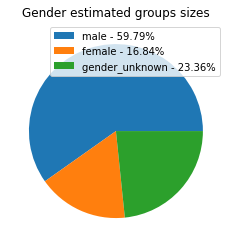

In [26]:

inferred_bias_report.plot_groups()


In [27]:

inferred_bias_report.estimated_groups_sizes


male              4313
female            1215
white             3887
black             1678
api                140
hispanic          1162
native              48
gender_unknown    1685
race_unknown       175
dtype: int64


#### Step 6: Bias Detector gender/race probablities


In [28]:

df[['first', 'last', 'race']].join(inferred_bias_report.p_groups).sample(10)


,first,last,race,male,female,white,black,api,hispanic,native
132,travis,wilson,Caucasian,0.994012,0.005988,0.748739,0.213934,0.000926,0.002705,0.025947
125,sue,middleton,Caucasian,0.000000,1.000000,0.921137,0.066347,0.004898,0.002128,0.005490
930,richard,klim,Caucasian,0.997657,0.002343,0.977960,0.000422,0.003954,0.004203,0.000598
2058,keith,powell,African-American,0.996764,0.003236,0.699583,0.269458,0.001083,0.001973,0.003130
4314,thaddaus,holmes,African-American,0.000000,0.000000,0.567900,0.372800,0.004200,0.023800,0.007600
5846,dante,thomas,African-American,1.000000,0.000000,0.271998,0.544587,0.043708,0.041471,0.000000
6658,demetris,lewis,African-American,0.000000,0.000000,0.582300,0.348400,0.005600,0.025800,0.012000
2888,charles,laurie,Caucasian,0.996076,0.003924,0.895883,0.074361,0.002301,0.004753,0.006284
1224,virgini,ocio,Caucasian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
702,geovani,johnson,African-American,0.000000,0.000000,0.589700,0.346300,0.005400,0.023600,0.009400



#### Step 7: Side by side comparison of COMPAS and Bias Detector


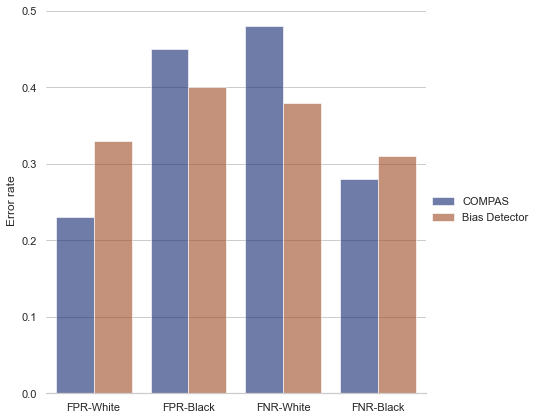

In [29]:


import seaborn as sns

data = [{'cat':'FPR-White', 'tool': 'COMPAS', 'rate':0.23}, \
        {'cat':'FPR-White', 'tool': 'Bias Detector', 'rate':0.33}, \
        {'cat':'FPR-Black', 'tool': 'COMPAS', 'rate':0.45}, \
        {'cat':'FPR-Black', 'tool': 'Bias Detector', 'rate':0.4}, \
        {'cat':'FNR-White', 'tool': 'COMPAS', 'rate':0.48}, \
        {'cat':'FNR-White', 'tool': 'Bias Detector', 'rate':0.38}, \
        {'cat':'FNR-Black', 'tool': 'COMPAS', 'rate':0.28}, \
        {'cat':'FNR-Black', 'tool': 'Bias Detector', 'rate':0.31}, \
       ]

df = pd.DataFrame(data)
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="cat", y="rate", hue="tool",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Error rate")
g.legend.set_title("")
